# Human de novo ttest analysis

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math

In [18]:
# import dtata tables 
proband=pd.read_csv("https://www.dropbox.com/s/g47l2r2kmjfzst2/aau1043_dnm.tsv?dl=1") 
ages=pd.read_csv("https://www.dropbox.com/s/vxc4tw1qv7j4s4h/aau1043_parental_age.tsv?dl=1")

In [44]:
ids=proband["Proband_id"].value_counts()
columns=["Proband_id","pat_dnm","mat_dnm","tot_dnm"]
only_pc=[]
for index,value in ids.items():
    temp_list=[]
    temp_list.append(index)
    gen=proband[proband["Proband_id"]==index]["Phase_combined"].value_counts()
    for name,amount in gen.items():
        temp_list.append(amount)
    temp_list.append(value)
    only_pc.append(temp_list)

In [45]:
common_prob=pd.DataFrame(only_pc)
common_prob.columns=columns
common_prob

,Proband_id,pat_dnm,mat_dnm,tot_dnm
0,91410,111,10,122
1,114094,98,22,121
2,111288,93,21,115
3,8147,78,27,114
4,88246,87,25,113
...,...,...,...,...
391,121087,36,1,37
392,62630,28,5,34
393,76504,27,5,34
394,37789,17,3,34


In [48]:
patient_summary=common_prob.merge(ages,on="Proband_id")
patient_summary


,Proband_id,pat_dnm,mat_dnm,tot_dnm,Father_age,Mother_age
0,91410,111,10,122,51,34
1,114094,98,22,121,51,44
2,111288,93,21,115,53,44
3,8147,78,27,114,40,33
4,88246,87,25,113,56,46
...,...,...,...,...,...,...
391,121087,36,1,37,18,17
392,62630,28,5,34,23,20
393,76504,27,5,34,19,17
394,37789,17,3,34,19,19


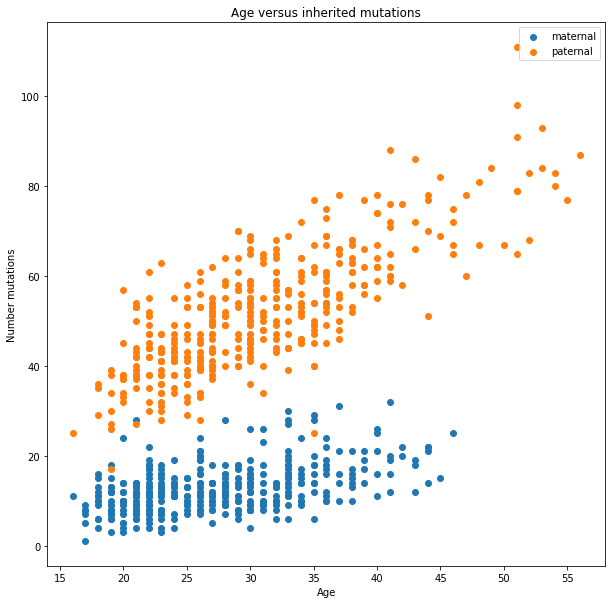

In [56]:
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(patient_summary["Mother_age"],patient_summary["mat_dnm"],label="maternal")
ax.scatter(patient_summary["Father_age"],patient_summary["pat_dnm"],label="paternal")
ax.set_ylabel("Number mutations")
ax.set_xlabel("Age")
ax.set_title("Age versus inherited mutations")
plt.legend()

In [91]:
#maternal
model = smf.ols(formula = "mat_dnm ~ Mother_age", data = patient_summary)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        14:35:31   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
#paternal
model = smf.ols(formula = "pat_dnm ~ Father_age", data = patient_summary)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        14:36:07   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Analysis 
1. Maternal R-squared: 0.228, slope: 0.3776
2. Paternal R-square: 0.619, slope: 1.3538

Neither are very good, but both statistics are apparently correlated because p value is zero. Paternal Age has a much larger effect

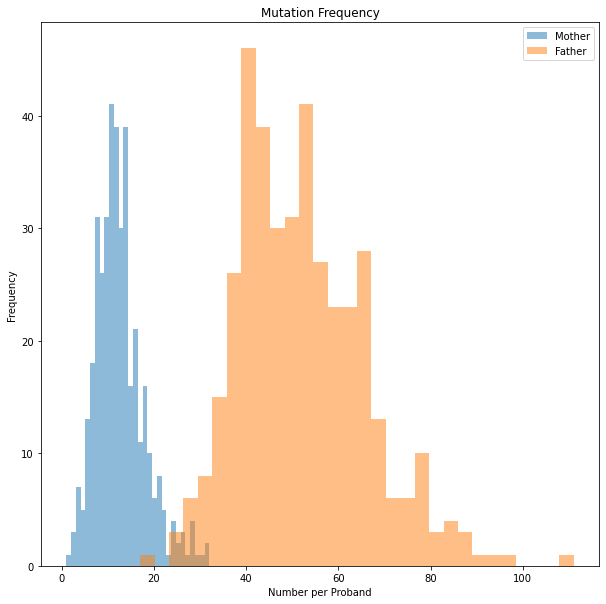

In [98]:
#histogram
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(patient_summary["mat_dnm"], label = "Mother", bins = 30, alpha = 0.5)
ax.hist(patient_summary["pat_dnm"], label = "Father", bins = 30, alpha = 0.5)
ax.set_xlabel("Number per Proband")
ax.set_ylabel("Frequency")
ax.set_title("Mutation Frequency")
plt.legend()
plt.show()

In [97]:
stats.ttest_rel(patient_summary["mat_dnm"], 
                patient_summary["pat_dnm"])

Ttest_relResult(statistic=-61.609297634918036, pvalue=1.1245140794573436e-204)

# Question 9 T-test result
Ttest_relResult(statistic=-61.609297634918036, pvalue=1.1245140794573436e-204)

pvalue is very small, looks statistically significant 

# Poisson Model 
Poisson model does basically the same thing as the OLS, but 

In [93]:
# poisson
#paternal
model = smf.poisson(formula = "Mother_age ~mat_dnm", data = patient_summary)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.141794
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:             Mother_age   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.05120
Time:                        14:37:19   Log-Likelihood:                -1244.2
converged:                       True   LL-Null:                       -1311.3
Covariance Type:            nonrobust   LLR p-value:                 4.765e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0289      0.026    117.716      0.000       2.978       3.079
mat_dnm        0.0210      0.002     11.785      0.000       0.018       0.025
==============================================================================
"""

In [94]:
#paternal
model_pat = smf.poisson(formula = "pat_dnm ~ Father_age", data = patient_summary)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.141794
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:             Mother_age   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.05120
Time:                        14:37:31   Log-Likelihood:                -1244.2
converged:                       True   LL-Null:                       -1311.3
Covariance Type:            nonrobust   LLR p-value:                 4.765e-31
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0289      0.026    117.716      0.000       2.978       3.079
mat_dnm        0.0210      0.002     11.785      0.000       0.018       0.025
==============================================================================
"""

# Question 11
Fit model using poisson equation. (Y=e^(ax+b) (Wow I really should start using markdown for this). 

In [95]:
# fitting to new data
#poisson model in general is y=e^(ax+b). This result 
print(math.exp(results.params[1]*50.5+results.params[0]))

59.83290562613057
